## This project builds a Multiple Linear Regression model using Python and the scikit-learn library. The goal is to understand how several input features together influence a target variable and to make numerical predictions based on those features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")
sns.set_palette("Spectral")

In [3]:
df = pd.read_csv("Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


# EDA

In [6]:
#EDA
from sklearn.preprocessing import LabelEncoder

# to convert the Extracurricular Activities from Yes/No to 1/0.
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<Axes: xlabel='Performance Index', ylabel='Count'>

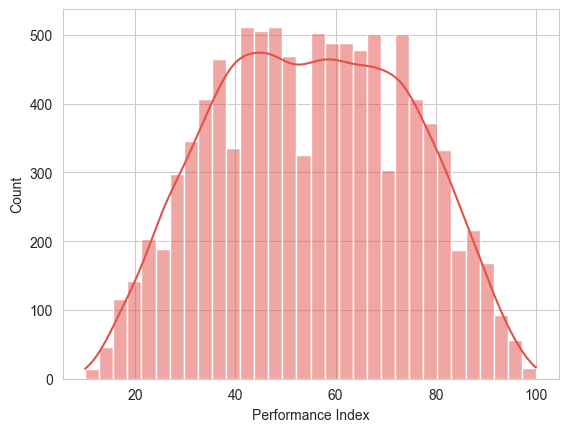

In [7]:
sns.histplot(df["Performance Index"], kde=True)


<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

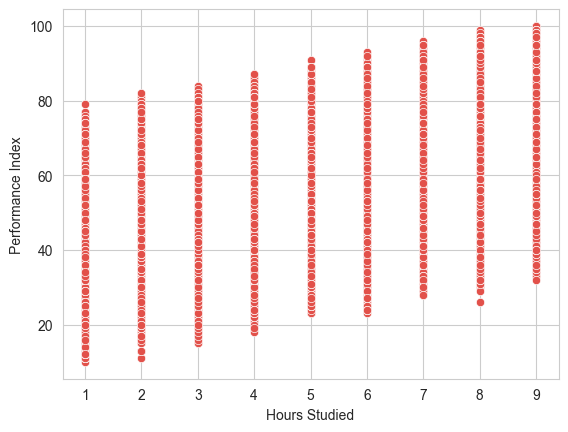

In [8]:
sns.scatterplot(data=df, x="Hours Studied", y="Performance Index")

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

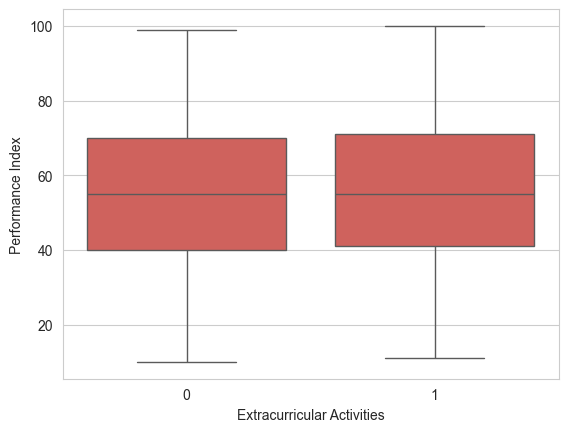

In [9]:
#used to see how outliers behave 
sns.boxplot(data=df, x="Extracurricular Activities", y="Performance Index")



<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

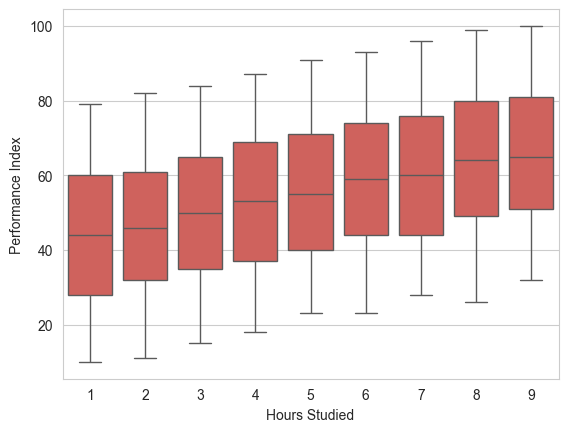

In [10]:
sns.boxplot(data=df, x="Hours Studied", y="Performance Index")


In [11]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [12]:
df["Extracurricular Activities"].unique()

array([1, 0])

In [13]:
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

In [14]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):

    sns.catplot(x = x_axis, y = y_axis, data = df, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

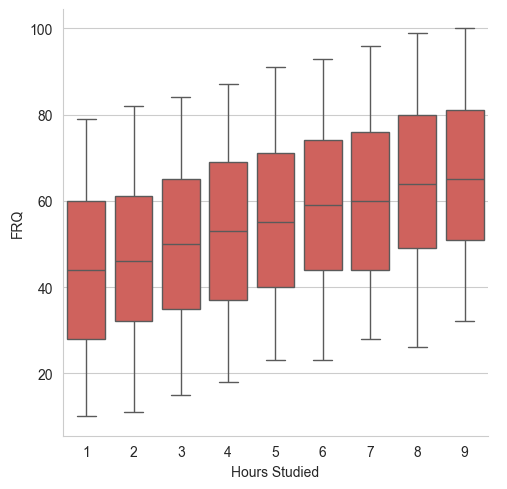

In [15]:
box_plot(x_axis = "Hours Studied", y_axis = "Performance Index")

/var/folders/rh/x4hn7p1x4h1165rtzb_5zjsc0000gn/T/ipykernel_5811/3097400463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index, y=result.values, palette='pastel')


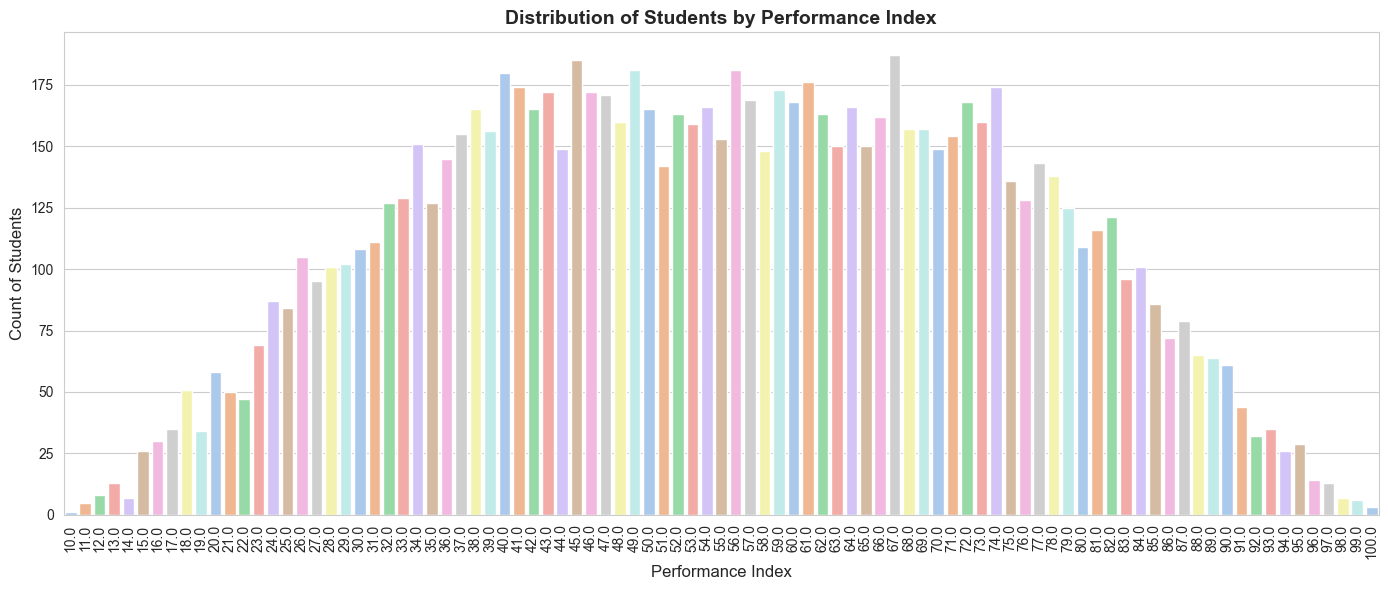

In [16]:
group = df.groupby("Performance Index").count()
result = group["Extracurricular Activities"]


sns.set_style("whitegrid")


plt.figure(figsize=(14, 6))
sns.barplot(x=result.index, y=result.values, palette='pastel')
plt.xlabel('Performance Index', fontsize=12)
plt.ylabel('Count of Students', fontsize=12)
plt.title('Distribution of Students by Performance Index', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [18]:
x = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [19]:
df.shape

(10000, 6)

# **train test split and model**



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=34)



model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# manually checkin the prediction of the data
ym_pred = model.predict([[5	,52	,1	,5	,2]])
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # compares the data with the avg 

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
print("spred" , ym_pred)



MAE: 1.638340303160842
MSE: 4.26691275512643
R2: 0.9885296169350715
spred [36.56374028]


/System/Volumes/Data/Users/shivendra/Developer/ML/MLR/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# this shows The comparision between the Actual Performance and Predicted Performance.

In [21]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : y_pred})

,Actual Performance,Predicted Performance
2390,68.0,67.681278
6803,38.0,38.198877
3226,51.0,52.343575
8630,43.0,45.061322
4898,76.0,77.011765
...,...,...
4448,75.0,75.755347
5082,34.0,33.695104
6867,70.0,70.068137
7908,52.0,52.910302


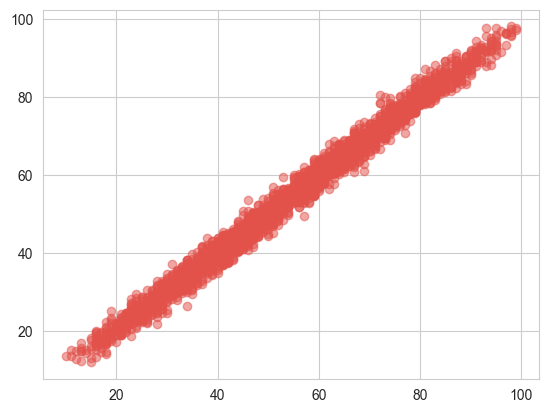

In [22]:
#this shows the relation between actual and predicted values
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.show()

In [23]:

# Feature Coefficients
pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})


,Feature,Coefficient
0,Hours Studied,2.853303
1,Previous Scores,1.017927
2,Extracurricular Activities,0.576338
3,Sleep Hours,0.485632
4,Sample Question Papers Practiced,0.184812


In [24]:
print(f"This is the intercept for the model {model.intercept_}")

This is the intercept for the model -34.0090841670901
